# Setup

In [11]:
import os
import glob

from roboflow import Roboflow
from ultralytics import YOLO, settings
root_dir = os.getcwd().replace('\\notebooks', '')
settings.update({'datasets_dir': f'{root_dir}/data/processed/test', 'runs_dir': f'{root_dir}/yolo/runs'})

# comment/uncomment to enable/disable printing
# print_amount = float('inf')
print_amount = 1

In [2]:
# TODO: Rename class names in roboflow dataset to Data Matrix
with open('../roboflow_api_key.txt') as f:
    api_key = f.read().strip()

rf = Roboflow(api_key=api_key)
project = rf.workspace('rs-xldmw').project('data-matrix-codes')
version = project.version(2)
dataset = version.download('yolov11', '../data/processed/')

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to ../data/processed/ in yolov11:: 100%|██████████| 366/366 [00:00<00:00, 1648.48it/s]


# Evaluation

In [13]:
# helper function to reduce code duplication
def eval_yolo(model_path, glob_path, print_count=1):
    # Load the model
    model = YOLO(model_path)

    # Run batched inference on a list of images (~5 seconds for 360 images (~0.014s per image))
    files = glob.glob(glob_path)
    results = model(files)

    # prediction counts
    total_boxes = 0
    images_with_boxes = 0
    for result in results:
        if result.boxes:
            images_with_boxes += 1
            total_boxes += len(result.boxes)
    print(f'Found {images_with_boxes}/{len(files)} with predictions')
    print(f'Found {total_boxes} total boxes')

    # display results
    count = 0
    for result in results:
        if result.boxes:
            print(result.show())
            count += 1
            if count >= print_count:
                break

## Kaggle from Scratch


0: 640x640 (no detections), 2.8ms
1: 640x640 1 Data Matrix, 2.8ms
2: 640x640 1 Data Matrix, 2.8ms
3: 640x640 5 Data Matrixs, 2.8ms
4: 640x640 (no detections), 2.8ms
5: 640x640 1 Data Matrix, 2.8ms
6: 640x640 (no detections), 2.8ms
7: 640x640 1 Data Matrix, 2.8ms
8: 640x640 1 Data Matrix, 2.8ms
9: 640x640 (no detections), 2.8ms
10: 640x640 (no detections), 2.8ms
11: 640x640 (no detections), 2.8ms
12: 640x640 2 Data Matrixs, 2.8ms
13: 640x640 5 Data Matrixs, 2.8ms
14: 640x640 (no detections), 2.8ms
15: 640x640 1 Data Matrix, 2.8ms
16: 640x640 1 Data Matrix, 2.8ms
17: 640x640 1 Data Matrix, 2.8ms
18: 640x640 (no detections), 2.8ms
19: 640x640 (no detections), 2.8ms
20: 640x640 2 Data Matrixs, 2.8ms
21: 640x640 4 Data Matrixs, 2.8ms
22: 640x640 3 Data Matrixs, 2.8ms
23: 640x640 (no detections), 2.8ms
24: 640x640 (no detections), 2.8ms
25: 640x640 1 Data Matrix, 2.8ms
26: 640x640 (no detections), 2.8ms
27: 640x640 1 Data Matrix, 2.8ms
28: 640x640 1 Data Matrix, 2.8ms
29: 640x640 2 Data Mat

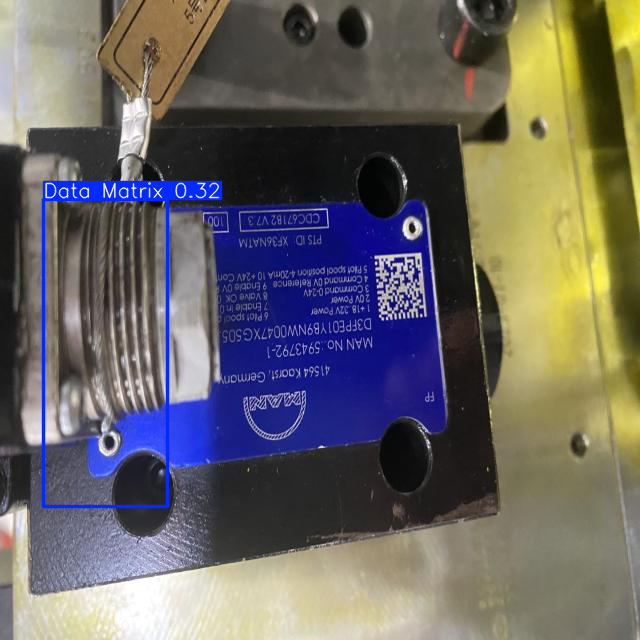

None


In [14]:
eval_yolo('../yolo/models/kaggle_scratch.pt', '../data/processed/test/images/*.jpg', print_count=1)